In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE ,r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


In [538]:
df = pd.read_csv("shoes_prices.csv")

In [539]:
df.head()

,brand,color,size,price,offer_price
0,Tresmode,Black,6.5,4647,4153
1,Lavie,Gold,4,2446,1172
2,FILA,Red,6,2346,1898
3,Crocs,Red,5,5942,5868
4,Crocs,Blue,4,2942,2118


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        5679 non-null   object
 1   color        5679 non-null   object
 2   size         5679 non-null   object
 3   price        5679 non-null   int64 
 4   offer_price  5679 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 222.0+ KB


In [541]:
df.describe()

,price,offer_price
count,5679.000000,5679.000000
mean,4945.126255,4007.745026
std,5344.881308,4761.543884
min,1346.000000,773.000000
25%,2942.000000,1968.000000
50%,3742.000000,2868.000000
75%,4646.000000,4048.000000
max,37947.000000,34123.000000


In [542]:
df.shape

(5679, 5)

In [543]:
df.isna().sum()

brand          0
color          0
size           0
price          0
offer_price    0
dtype: int64

In [544]:
df.duplicated().sum()

np.int64(1042)

In [545]:
df.drop_duplicates(inplace=True)

In [546]:
df.shape

(4637, 5)

In [547]:
sorted(df["brand"].unique())

['Adidas',
 'Asics',
 'Bata',
 'Buckaroo',
 'Converse',
 'Crocs',
 'FILA',
 'Footin',
 'Franco Leone',
 'Havaianas',
 'Hidesign',
 'Hush Puppies',
 'Imperial India Company',
 'LaBriza',
 'Lavie',
 'Lee Cooper',
 'Liberty',
 'Nike',
 'Numero Uno',
 'PUMA',
 'Power',
 'Reebok',
 'Sting',
 'Toms',
 'Toni Rossi',
 'Tory Burch',
 'Tresmode',
 'Umbro',
 'Vanilla Moon',
 'Woodland']

In [548]:
df["color"].unique()

array(['Black', 'Gold', 'Red', 'Blue', 'Brown', 'White', 'Black & Red',
       'Bordo', 'Camel', 'Light Tan', 'Grey', 'Tan', 'Silver',
       'Navy & Red', 'Green', 'Navy', 'Pink', 'Beige', 'Yellow', 'Orange',
       'Grey & Blue', 'Purple', 'Blush', 'Multi', 'Gray', 'Off White',
       'Grey & Red', 'Black & White', 'Midnight Blue ', 'Olive',
       'Black/Orange', 'Khaki', 'Black & Maroon', 'Tan Light Brown',
       'Black & Neon Green', 'Dark Brown', 'Rose Gold', 'Pewter',
       'Multi Color', 'Charcoal', 'Makhani', 'Cognac', 'Black/Green',
       'Cherry', 'Navy & Orange', 'Light Grey', 'White and Silver',
       'Taupe', 'Ash', 'Reddish Brown', 'Cool Blue', 'Light Brown',
       'Navy Blue', 'Black ', 'Natural White', 'Nude', 'Black/Blue',
       'Champagne', 'Camel Brown', 'Black & Blue', 'Peach', 'Olive Green',
       'Red & Black', 'Arabesco White', 'Coral', 'Khakhi', 'Tobacco',
       'Gold Silver', 'Blue & White', 'Cream', 'Maroon', 'White ',
       'Aqua Green', 'Black and 

In [549]:
df["size"].unique()

array(['6.5', '4', '6', '5', '8', '10', '11', '3', '7', '9', '2.5', '12',
       '12.5', '2', '3.5', '13', '7.5', '10.5', '4.5', '8.5', '41', '40',
       'UK-09', '9.5', 'UK-07', '14', '5.5', 'UK-10', 'UK-06', 'UK-08',
       '15', '37', '16', 'UK-11', '39', '1', '38', '11.5'], dtype=object)

In [550]:
df["brand"] = df["brand"].astype('category')
df["color"] = df["color"].astype('category')
df["size"] = df["size"].astype('category')

In [551]:
df["brand"] = df["brand"].cat.codes
df["color"] = df["color"].cat.codes
df["size"] = df["size"].cat.codes

In [552]:
df.head()

,brand,color,size,price,offer_price
0,26,4,25,4647,4153
1,14,45,18,2446,1172
2,6,89,24,2346,1898
3,5,89,22,5942,5868
4,5,22,18,2942,2118


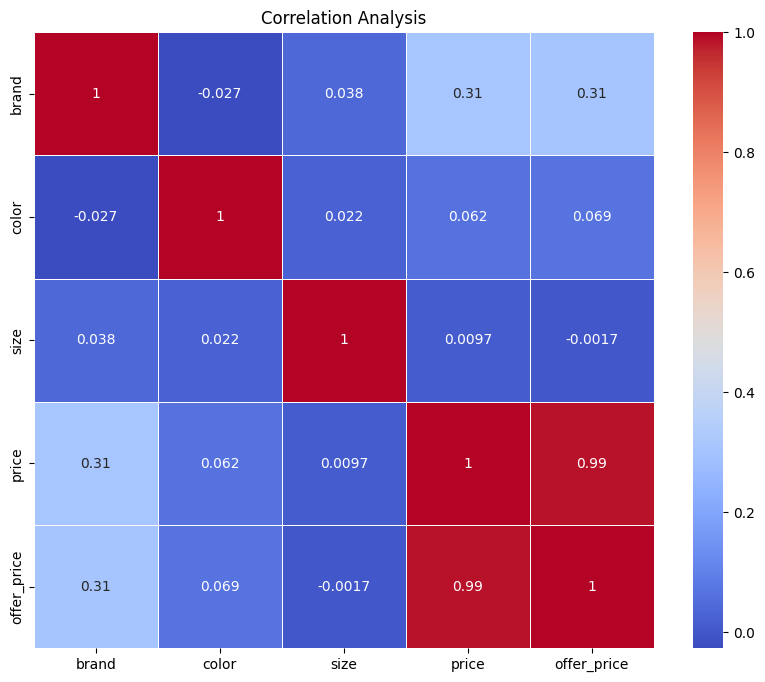

In [553]:
column = ["brand","color","size","price","offer_price"]
corr = df[column].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Analysis')
plt.show()

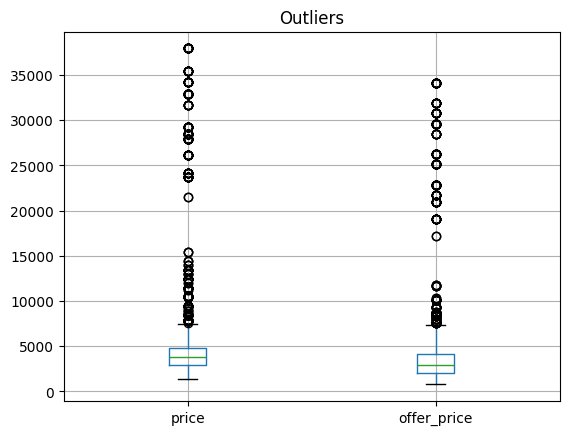

In [554]:
column = df[["price","offer_price"]]

column.boxplot()
plt.title("Outliers")
plt.show()

In [555]:
df = df[df["price"]<15000]
df

,brand,color,size,price,offer_price
0,26,4,25,4647,4153
1,14,45,18,2446,1172
2,6,89,24,2346,1898
3,5,89,22,5942,5868
4,5,22,18,2942,2118
...,...,...,...,...,...
5669,6,4,26,4146,3343
5670,8,4,28,2142,1053
5673,6,52,3,3046,2172
5674,23,91,18,6747,5098


In [556]:
scaler = StandardScaler()

data_scaler = scaler.fit_transform(df)

df_scaler = pd.DataFrame(data_scaler, columns=df.columns)

In [557]:
X = df_scaler.drop(columns=["price"])
y = df_scaler["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [558]:
def evaluate(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = MSE(y_test, y_pred)
    score = r2_score(y_test, y_pred)

    print("mse  : ",mse)
    print("score  : ",score)

    return score


In [559]:
knn = KNeighborsRegressor()
linr = LinearRegression()
ridge = Ridge(alpha=10)
rf = RandomForestRegressor(n_estimators=10,random_state=9)
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=0.13,random_state=9)
gb = GradientBoostingRegressor(max_depth=6,n_estimators=10,random_state=9)


In [560]:
models = {"KNeighborsRegressor":knn,"LinearRegression":linr,"Ridge":ridge,"RandomForestRegressor":rf,"DecisionTreeRegressor":dt,"GradientBoostingRegressor":gb}

In [561]:
score = {}

for name,model in models.items():
    print(name)
    value = evaluate(model,X_train,y_train,X_test,y_test)
    score[name] = value
    print()

KNeighborsRegressor
mse  :  0.11736322258021878
score  :  0.8688860077153107

LinearRegression
mse  :  0.21450368428251862
score  :  0.7603641601879815

Ridge
mse  :  0.2144055682364365
score  :  0.7604737719234655

RandomForestRegressor
mse  :  0.029587907423752856
score  :  0.9669454486644959

DecisionTreeRegressor
mse  :  0.29907072047924704
score  :  0.6658888936805523

GradientBoostingRegressor
mse  :  0.16775106326129213
score  :  0.8125945152949763



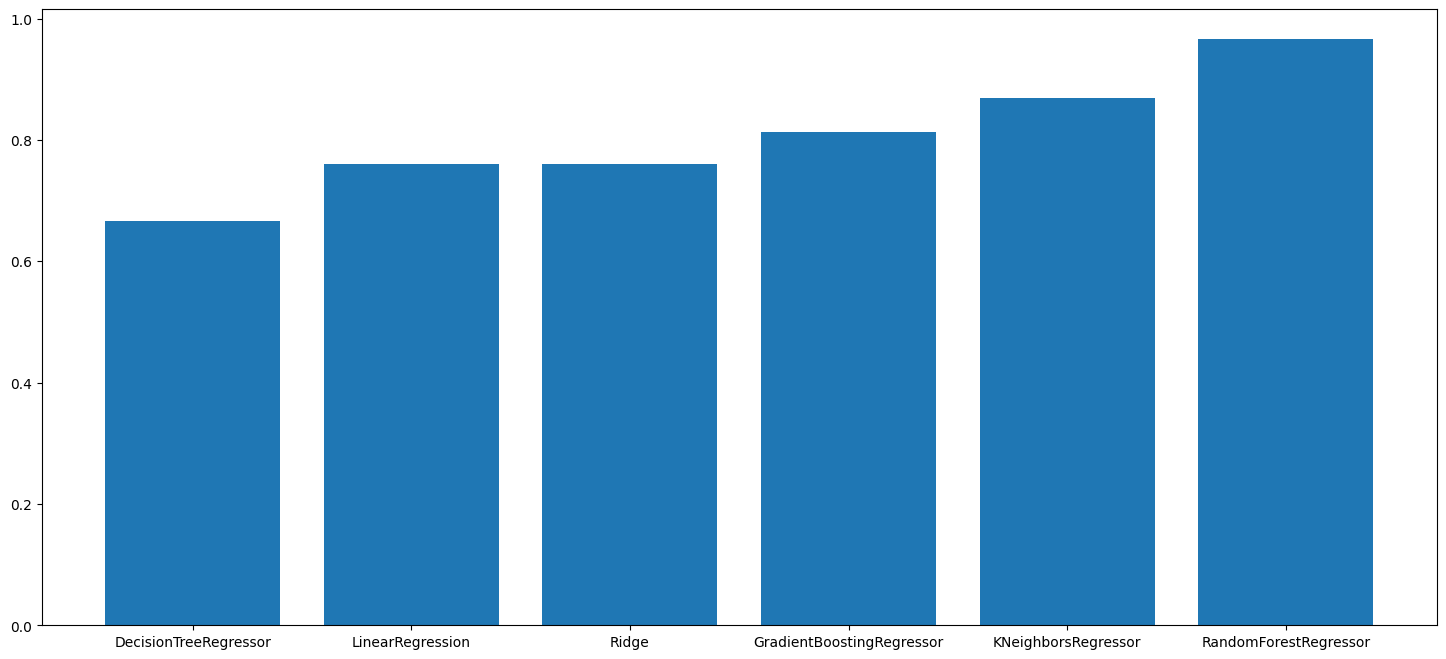

In [562]:
sorted_score = dict(sorted(score.items(), key=lambda item: item[1]))

names = list(sorted_score.keys())
values = list(sorted_score.values())

plt.figure(figsize=(18, 8))
plt.bar(range(len(score)), values, tick_label=names)
plt.show()
